In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Classification data generation

In [2]:
# Data generation
np.random.seed(0)

n = 200
features = np.random.random(size=(n // 2, 2))
label = np.zeros((features.shape[0],))
temp = np.random.random(size=(n // 2, 2)) + np.array([0.5, 0.6])
features = np.concatenate((features, temp), axis=0)
label = np.concatenate((label, np.ones((temp.shape[0],))), axis=0)

df = pd.DataFrame({'feature1': features[:, 0], 'feature2': features[:, 1], 'label': label})
shuffled_df = df.sample(frac=1)

train_df = shuffled_df.iloc[:-1]
test_row = shuffled_df.iloc[-1]
feat_names = ['feature1', 'feature2']

## KNN classifier from a previous week

In [3]:
# KNN Classifier

K = 5

neighbor_dist_list = [9999999] * K
neighbor_label_list = [-1] * K
neighbor_id_list = [-1] * K


for i in range(len(train_df)):
    train_row = train_df.iloc[i]
    dist = (train_row['feature1'] - test_row['feature1'])**2 + (train_row['feature2'] - test_row['feature2'])**2
    dist = np.sqrt(dist)
    
    if dist < neighbor_dist_list[-1]:
        for j in range(K):
            if dist < neighbor_dist_list[j]:
                for l in reversed(range(j + 1, K)):
                    neighbor_dist_list[l] = neighbor_dist_list[l - 1]
                    neighbor_label_list[l] = neighbor_label_list[l - 1]
                    neighbor_id_list[l] = neighbor_id_list[l - 1]
                neighbor_dist_list[j] = dist
                neighbor_label_list[j] = train_row['label']
                neighbor_id_list[j] = i
                break

print(f'{K}-nearest neighbor distances:', neighbor_dist_list)
print(f'{K}-nearest neighbor ids:', neighbor_id_list)
print(f'{K}-nearest neighbor labels:', neighbor_label_list)

5-nearest neighbor distances: [0.034190671199808266, 0.04881913877229203, 0.08318791618546148, 0.0971962613542556, 0.1171119040085012]
5-nearest neighbor ids: [142, 169, 95, 15, 36]
5-nearest neighbor labels: [0.0, 0.0, 0.0, 0.0, 0.0]


## Decision Tree classifier from a previous week

In [4]:
# Decision tree learning (split of the first node)


def gini(class0_count, class1_count):
    n = class0_count + class1_count
    return 2 * (class0_count / n) * (class1_count / n)


for attribute_name in feat_names:

    cutoffs = sorted(train_df[attribute_name].unique())[:-1]

    best_gini = 1
    best_cutoff = cutoffs[0]
    for cutoff in cutoffs:
        split = train_df[attribute_name] > cutoff
        left_child = train_df[split == True]
        right_child = train_df[split == False]

        left_child_gini = gini((left_child['label'] == False).sum(), (left_child['label'] == True).sum())
        right_child_gini = gini((right_child['label'] == False).sum(), (right_child['label'] == True).sum())
        tmp_var = (left_child_gini * len(left_child) + right_child_gini * len(right_child))
        avg_gini = tmp_var / (len(left_child) + len(right_child))

        if avg_gini < best_gini:
            best_gini = avg_gini
            best_cutoff = cutoff

    print(f'Best gini impurity for {attribute_name}:', best_gini)
    print(f'Best cutoff for {attribute_name}:', best_cutoff)


Best gini impurity for feature1: 0.31500951358735424
Best cutoff for feature1: 0.7395507950492876
Best gini impurity for feature2: 0.26762009418443816
Best cutoff for feature2: 0.6214784014997635


## Regression data generation

In [5]:
# Data generation
np.random.seed(0)

n = 200
features = np.random.random(size=(n // 2, 2))
# label = np.zeros((features.shape[0],))
temp = np.random.random(size=(n // 2, 2)) + np.array([0.5, 0.6])
features = np.concatenate((features, temp), axis=0)
# label = np.concatenate((label, np.ones((temp.shape[0],))), axis=0)

# change the label to a continuous function of the features
label = 2 * features[:, 0] - 0.5 * features[:, 1] + 0.1 * np.random.random(size = (n,))

df = pd.DataFrame({'feature1': features[:, 0], 'feature2': features[:, 1], 'label': label})
shuffled_df = df.sample(frac=1)

train_df = shuffled_df.iloc[:-1]
test_row = shuffled_df.iloc[-1]
feat_names = ['feature1', 'feature2']

## F

In [6]:
# KNN Classifier

K = 5

neighbor_dist_list = [9999999] * K
neighbor_label_list = [-1] * K
neighbor_id_list = [-1] * K


for i in range(len(train_df)):
    train_row = train_df.iloc[i]
    dist = (train_row['feature1'] - test_row['feature1'])**2 + (train_row['feature2'] - test_row['feature2'])**2
    dist = np.sqrt(dist)
    
    if dist < neighbor_dist_list[-1]:
        for j in range(K):
            if dist < neighbor_dist_list[j]:
                for l in reversed(range(j + 1, K)):
                    neighbor_dist_list[l] = neighbor_dist_list[l - 1]
                    neighbor_label_list[l] = neighbor_label_list[l - 1]
                    neighbor_id_list[l] = neighbor_id_list[l - 1]
                neighbor_dist_list[j] = dist
                neighbor_label_list[j] = train_row['label']
                neighbor_id_list[j] = i
                break

print(f'{K}-nearest neighbor distances:', neighbor_dist_list)
print(f'{K}-nearest neighbor ids:', neighbor_id_list)
print(f'{K}-nearest neighbor labels:', neighbor_label_list)

5-nearest neighbor distances: [0.08092894395194485, 0.08909216729873655, 0.10414030359109963, 0.11302105115578934, 0.1215358265569795]
5-nearest neighbor ids: [162, 135, 133, 187, 48]
5-nearest neighbor labels: [0.6060717292402144, 0.9367672279929389, 0.7132060032346378, 1.0230800647497662, 1.094224028357845]


In [7]:
print(f'{K}-nearest neighbor prediction:', np.mean(neighbor_label_list))

5-nearest neighbor prediction: 0.8746698107150805


### Sklearn KNeighborsRegressor

In [8]:
from sklearn import neighbors

In [12]:
model = neighbors.KNeighborsRegressor(5)
model.fit(train_df[feat_names].to_numpy(), train_df['label'].to_numpy())
model.predict(test_row[feat_names].to_numpy().reshape(1, -1))

array([0.87466981])

## Decision tree regressor

In [15]:
# Decision tree learning (split of the first node)


def mse(values):
    mean_values = sum(values) / len(values)
    return sum([(v - mean_values) ** 2 for v in values]) / len(values)


for attribute_name in feat_names:

    cutoffs = sorted(train_df[attribute_name].unique())[:-1]

    best_gini = 1
    best_cutoff = cutoffs[0]
    for cutoff in cutoffs:
        split = train_df[attribute_name] > cutoff
        left_child = train_df[split == True]
        right_child = train_df[split == False]

        left_child_mse = mse(left_child['label'].tolist())
        right_child_mse = mse(right_child['label'].tolist())
        tmp_var = (left_child_mse * len(left_child) + right_child_mse *len(right_child))
        avg_gini = tmp_var / (len(left_child) + len(right_child))

        if avg_gini < best_gini:
            best_gini = avg_gini
            best_cutoff = cutoff

    print(f'Best gini impurity for {attribute_name}:', best_gini)
    print(f'Best cutoff for {attribute_name}:', best_cutoff)


Best gini impurity for feature1: 0.18097212371960492
Best cutoff for feature1: 0.7930202845077967
Best gini impurity for feature2: 0.4378467289391777
Best cutoff for feature2: 0.983463894171898


### Prediction of a decision tree regressor with only one split

In [17]:
attribute_name = 'feature1'
cutoff = 0.7930202845077967
split = train_df[attribute_name] > cutoff
left_child = train_df[split == True]
right_child = train_df[split == False]

# predictions on test_row
if test_row[attribute_name] > cutoff:
    print('Decision tree regressor prediction (arrived at left):', np.mean(left_child['label'].tolist()))
else:
    print('Decision tree regressor prediction (arrived at right):', np.mean(right_child['label'].tolist()))

Decision tree regressor prediction (arrived at right): 0.6987982129007874


## SKlearn DecisionTreeRegressor

In [18]:
from sklearn import tree

In [20]:
model = tree.DecisionTreeRegressor(max_depth = 1)
model.fit(train_df[feat_names].to_numpy(), train_df['label'].to_numpy())
model.predict(test_row[feat_names].to_numpy().reshape(1, -1))

array([0.69879821])

[Text(0.5, 0.75, 'feature1 <= 0.793\nsquared_error = 0.464\nsamples = 199\nvalue = 1.172'),
 Text(0.25, 0.25, 'squared_error = 0.207\nsamples = 111\nvalue = 0.699'),
 Text(0.75, 0.25, 'squared_error = 0.149\nsamples = 88\nvalue = 1.769')]

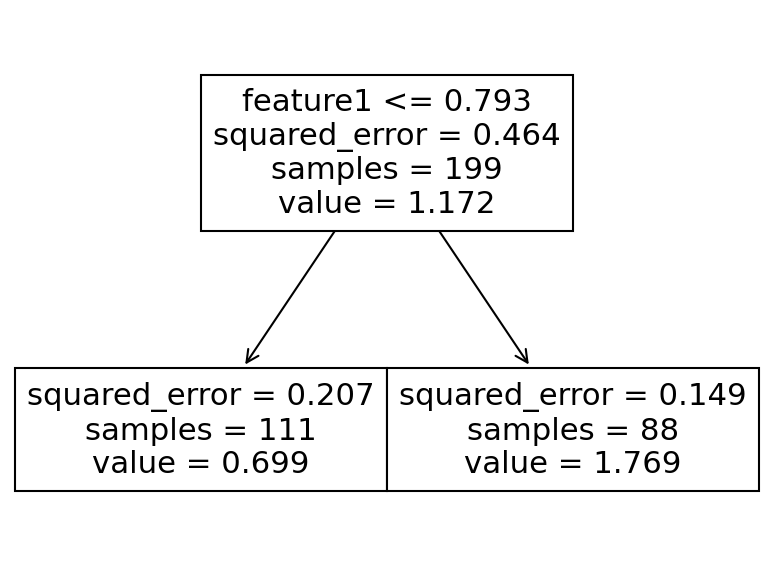

In [21]:
plt.figure(dpi=150)
tree.plot_tree(model, feature_names=feat_names)

In [26]:
model.predict(np.array([[0.8, 0.1], [0.3, 0.5], [0.1, 0.3], [0.9, 0.1]]))

array([1.7692004 , 0.69879821, 0.69879821, 1.7692004 ])

[Text(0.5, 0.875, 'feature1 <= 0.793\nsquared_error = 0.464\nsamples = 199\nvalue = 1.172'),
 Text(0.25, 0.625, 'feature1 <= 0.521\nsquared_error = 0.207\nsamples = 111\nvalue = 0.699'),
 Text(0.125, 0.375, 'feature1 <= 0.191\nsquared_error = 0.094\nsamples = 47\nvalue = 0.277'),
 Text(0.0625, 0.125, 'squared_error = 0.021\nsamples = 18\nvalue = -0.046'),
 Text(0.1875, 0.125, 'squared_error = 0.034\nsamples = 29\nvalue = 0.477'),
 Text(0.375, 0.375, 'feature2 <= 0.537\nsquared_error = 0.062\nsamples = 64\nvalue = 1.009'),
 Text(0.3125, 0.125, 'squared_error = 0.027\nsamples = 23\nvalue = 1.219'),
 Text(0.4375, 0.125, 'squared_error = 0.044\nsamples = 41\nvalue = 0.891'),
 Text(0.75, 0.625, 'feature1 <= 1.138\nsquared_error = 0.149\nsamples = 88\nvalue = 1.769'),
 Text(0.625, 0.375, 'feature1 <= 0.932\nsquared_error = 0.053\nsamples = 53\nvalue = 1.518'),
 Text(0.5625, 0.125, 'squared_error = 0.044\nsamples = 25\nvalue = 1.373'),
 Text(0.6875, 0.125, 'squared_error = 0.025\nsamples = 28

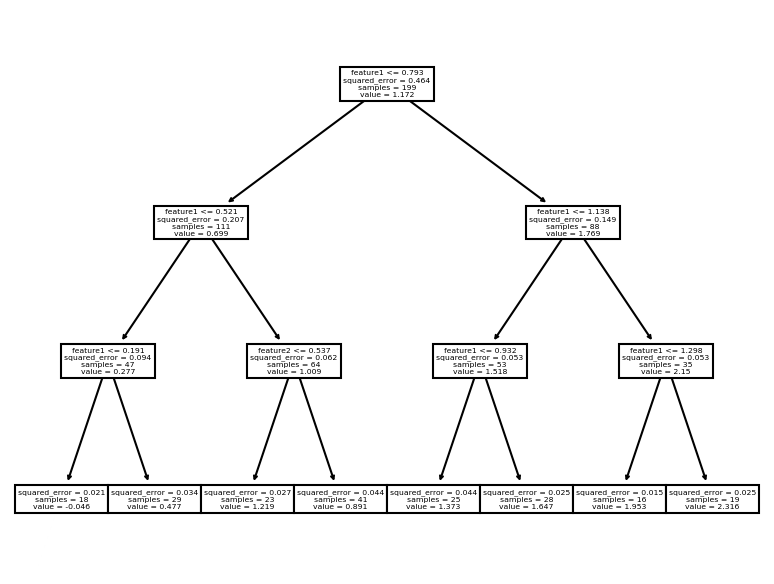

In [28]:
model = tree.DecisionTreeRegressor(max_depth = 3)
model.fit(train_df[feat_names].to_numpy(), train_df['label'].to_numpy())
plt.figure(dpi=150)
tree.plot_tree(model, feature_names=feat_names)